In [ ]:
# Model Development


'''
model developed will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

Do I know if the dealer is offering fair value for my trade-in?
Do I know if I put a fair value on my car?
In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.
'''




In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn 
!pip install scikit-learn

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [5]:
URL= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(URL)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# 1----> Linear Regression and Multiple Linear Regression


# Simple Linear Regression
'''
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.
'''
Yhat = a + b  X

# Linear Function
'''
a refers to the intercept of the regression line, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit
'''

In [11]:
# Let's load the modules for linear regression:

from sklearn.linear_model import LinearRegression

#Create the linear regression object:
lm = LinearRegression()
lm


LinearRegression()

In [13]:
# How could "highway-mpg" help us predict car price?

x = df[['highway-mpg']]
y = df[['price']]


# Fit the linear model using highway-mpg:
lm.fit(x,y)



LinearRegression()

In [15]:
# we can output the prediction

yhat = lm.predict(x)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [17]:
# What is the value of the intercept (a)?
lm.intercept_

array([38423.30585816])

In [19]:
# What is the value of the slope (b) ?

lm.coef_

array([[-821.73337832]])

In [21]:
# What is the final estimated linear model we get?

''' 
we should get a final linear model with the structure:

Yhat = a + bx


Plugging in the actual values we get:

'''
price = 38423.31 - 821.73 * df['highway-mpg']
price

0      16236.60
1      16236.60
2      17058.33
3      13771.41
4      20345.25
         ...   
196    15414.87
197    17880.06
198    19523.52
199    16236.60
200    17880.06
Name: highway-mpg, Length: 201, dtype: float64

In [23]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

lm1 = LinearRegression()
lm1

LinearRegression()

In [25]:
x = df[["engine-size"]]
y = df[["price"]]

lm1.fit(x,y)

yhat = lm1.predict(x)
print("yhat values:\n",yhat[0:5])

# intercept
print("The intercept value is: ", lm1.intercept_)

#slope

print("The value of Slope is:", lm1.coef_)

# What is the equation of the predicted line

Price = -7963.33890628 + 166.86001569 * (df["engine-size"])
print("Prdicted price value of car based on engine-size is:\n",Price)



yhat values:
 [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]
 [14729.62322775]]
The intercept value is:  [-7963.33890628]
The value of Slope is: [[166.86001569]]
Prdicted price value of car based on engine-size is:
 0      13728.463133
1      13728.463133
2      17399.383479
3      10224.402804
4      14729.623228
           ...     
196    15563.923306
197    15563.923306
198    20903.443808
199    16231.363369
200    15563.923306
Name: engine-size, Length: 201, dtype: float64


In [ ]:
# Multiple Linear Regression

'''
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. 
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain 
the relationship between one continuous response (dependent) variable and two or more predictor (independent)
variables. Most of the real-world regression models involve multiple predictors. We will illustrate the 
structure by using four predictor variables, but these results can generalize to any integer:

'''

#The equation is given by:

Yhat = a + b1X1 + b2X2 + b3X3 + b4X4

'''
From the previous section we know that other good predictors of price could be:

Horsepower
Curb-weight
Engine-size
Highway-mpg
Let's develop a model using these variables as the predictor variables.

'''



In [27]:
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y =df[['price']]

lm.fit(x,y)

#intercept---(a)

print("Intercept value:",lm.intercept_)

#Slope-----(b, b2, b3, b4)

print("Slope value:", lm.coef_)

Intercept value: [-15806.62462633]
Slope value: [[53.49574423  4.70770099 81.53026382 36.05748882]]


In [29]:
# What is the final estimated linear model that we get?

# Yhat = a + b1X1 + b2X2 + b3X3 + b4X4
Price = -15806.62462633 + (53.49574423 * df['horsepower']) + (4.70770099 * df['curb-weight']) + (81.53026382 * df['engine-size']) + (36.05748882 * df['highway-mpg'])
Price

0      13699.111600
1      13699.111600
2      19051.654690
3      10620.361920
4      15521.314189
           ...     
196    16694.400424
197    19503.679188
198    20475.458366
199    17804.038799
200    17104.075066
Length: 201, dtype: float64

In [ ]:
# 2 ---> Model Evaluation Using Visualization


'''
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do 
this is by using a visualization.
'''


In [32]:
! pip install seaborn 

In [34]:
import seaborn as sns
%matplotlib inline 

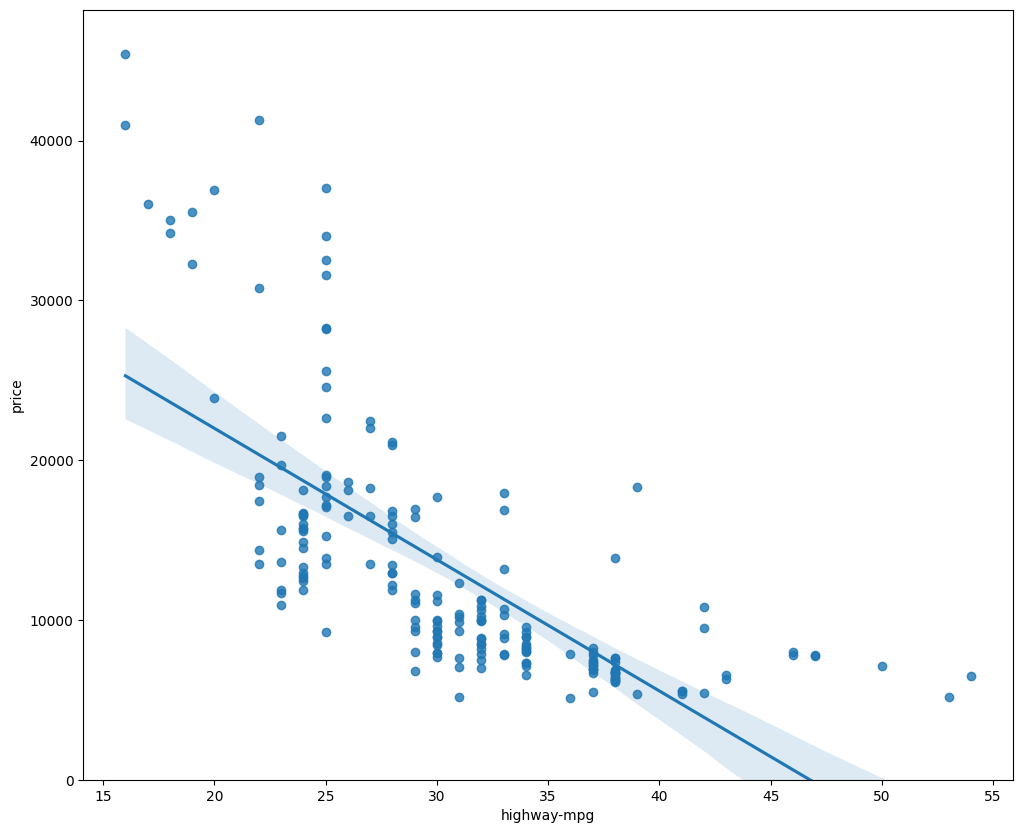

In [36]:
# Regression Plot

'''

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by 
using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted 
linear regression line going through the data. This will give us a reasonable estimate of the relationship 
between the two variables, the strength of the correlation, as well as the direction (positive or negative 
correlation).
'''

# Let's visualize highway-mpg as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot( x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)
plt.show()


In [ ]:
'''
We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is 
negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data 
points are around the regression line. This will give you a good indication of the variance of the data and 
whether a linear model would be the best fit or not. If the data is too far off from the line, this linear 
model might not be the best model for this data.
'''



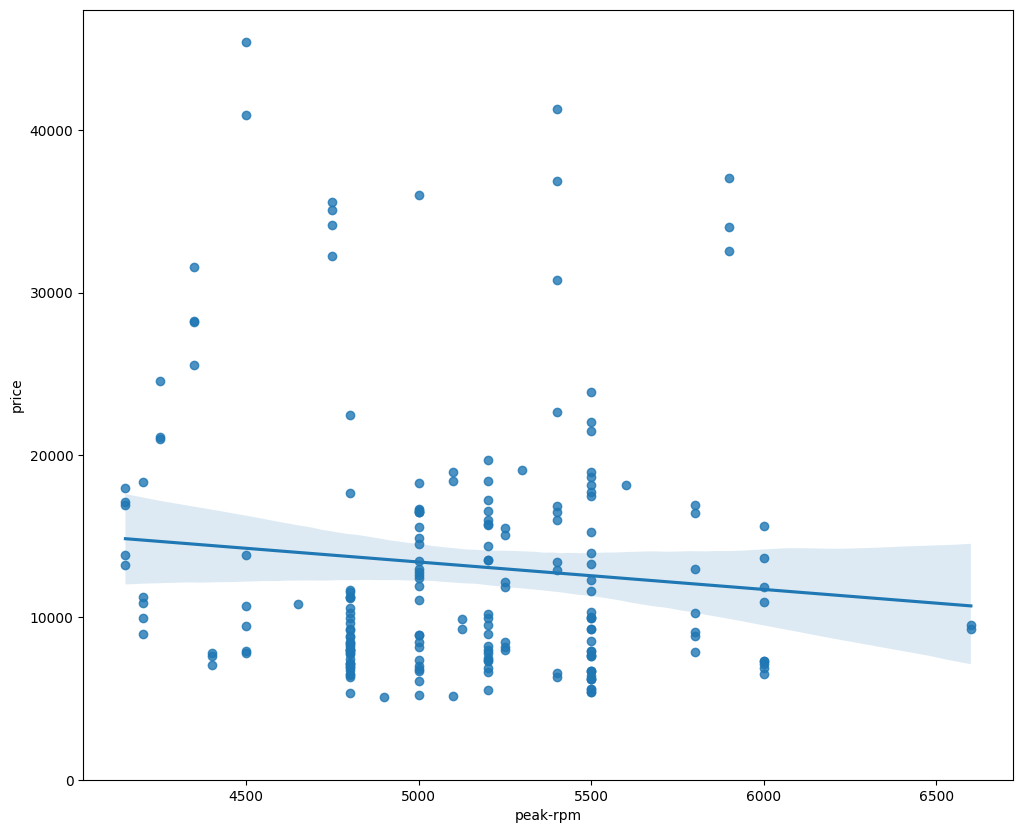

In [38]:
# Let's compare this plot to the regression plot of "peak-rpm".

plt.figure(figsize = (width, height))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)
plt.show()

In [ ]:
'''
Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" 
are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread 
around the predicted line and it is much harder to determine if the points are decreasing or increasing as 
the "peak-rpm" increases.'''


In [40]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? 
# Use the method ".corr()" to verify your answer.

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [ ]:
# Residual Plot

'''
A good way to visualize the variance of the data is to use a residual plot.


1) What is a residual?

--> The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
When we look at a regression plot, the residual is the distance from the data point to the fitted regression 
line.


2) So what is a residual plot?

--> A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable 
on the horizontal x-axis.


3) What do we pay attention to when looking at a residual plot?

--> We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is 
appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is 
a good fit for this data.


'''




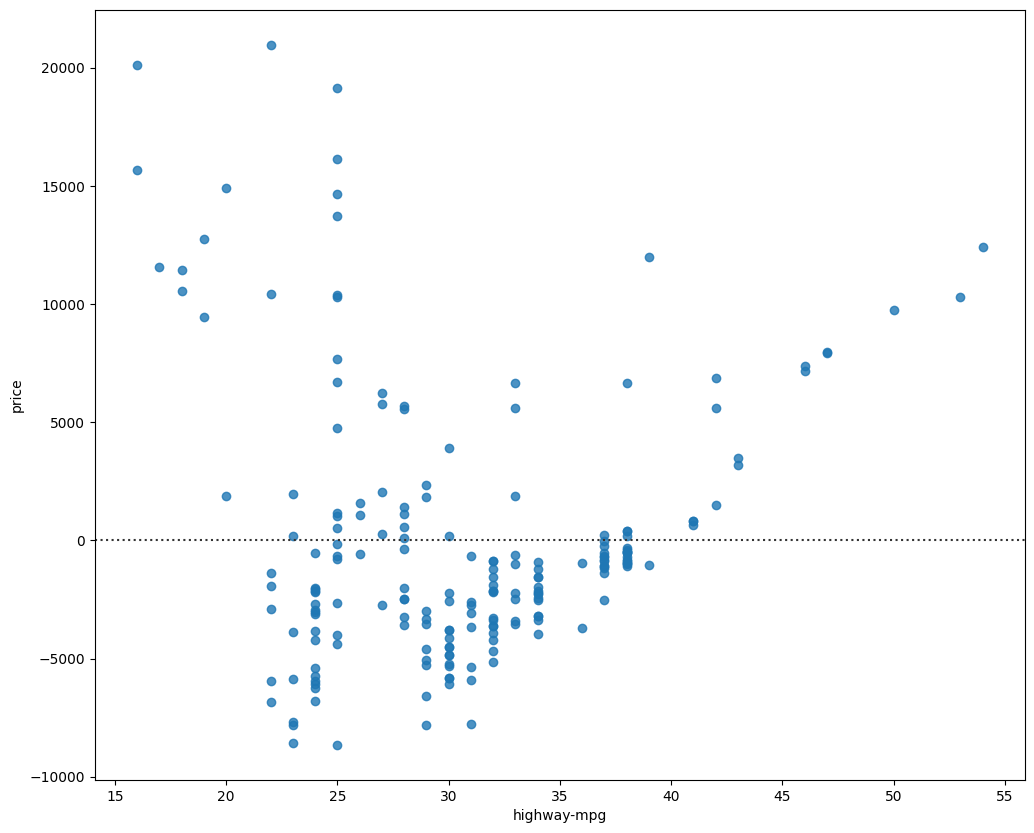

In [50]:
width = 12
height = 10
plt.figure(figsize=( width, height))

sns.residplot( x = df["highway-mpg"], y = df["price"], data = df)
plt.show()

In [ ]:
# Multiple Linear Regression---visualisation

'''

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you 
can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. 
We can look at the distribution of the fitted values that result from the model and compare it to the 
distribution of the actual values.

'''


In [68]:
# First, let's make a prediction:
lm = LinearRegression()
lm

z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

y = df[["price"]]

lm.fit(z,y)


Y_hat = lm.predict(z)

/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_95969/2899488382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual_data = sns.distplot( df['price'], hist = False, color ="r", label = "Actual Values")
/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_95969/2899488382.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

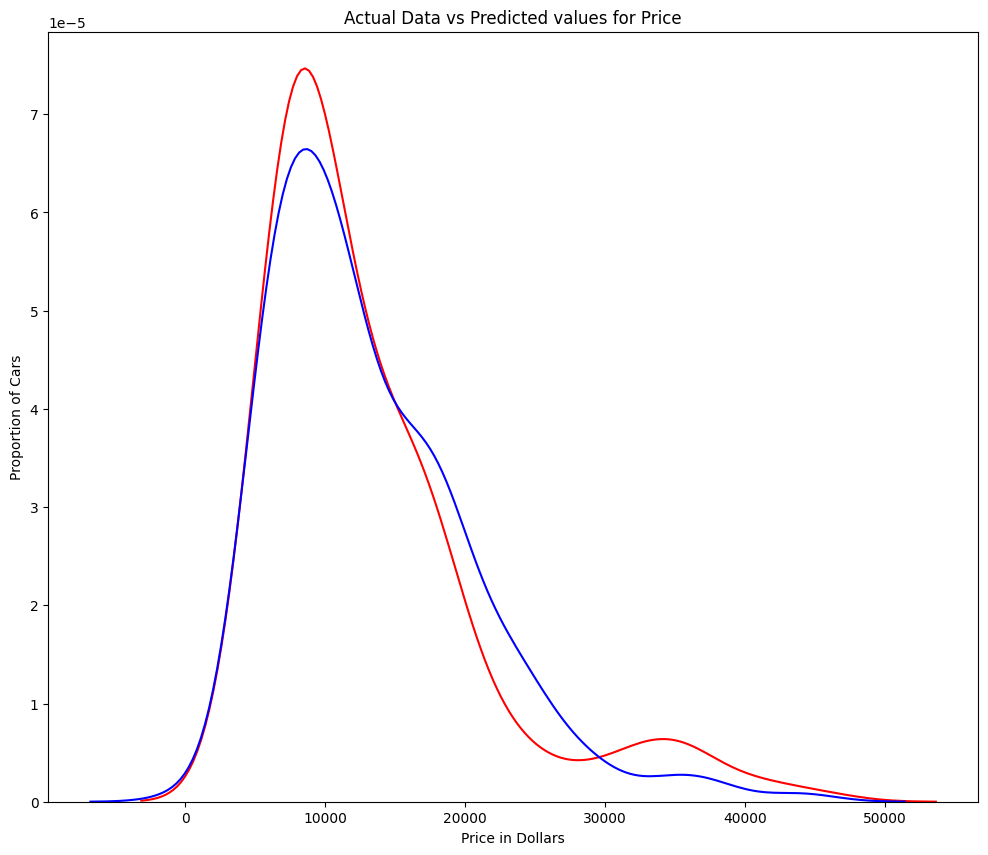

In [70]:
plt.figure(figsize = (width, height))

actual_data = sns.distplot( df['price'], hist = False, color ="r", label = "Actual Values")

sns.distplot(Y_hat, hist =False, color ="b", label = "Predicted Vslues", ax = actual_data)

plt.title("Actual Data vs Predicted values for Price")
plt.xlabel("Price in Dollars")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

In [ ]:
'''
We can see that the fitted values are reasonably close to the actual values since the two distributions 
overlap a bit. However, there is definitely some room for improvement.
'''


In [ ]:
# 3----> Polynomial Regression and Pipelines


'''
Polynomial regression is a particular case of the general linear regression model or multiple linear 
regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
'''

#There are different orders of polynomial regression:
'''
Quadratic - 2nd Order
'''
Yhat = a + b1X + b2X(X)
'''
Cubic - 3rd Order
'''

Yhat = a + b1X + b2X(X) + b3X(X)(X)

'''
Higher-Order:
'''

Yhat = a + b1X + b2X(X) + b3X(X)(X)....

    
'''
We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

'''


In [255]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()  # get current axes
    ax.set_facecolor((0.798, 0.798, 0.798)) # these number are RBG colorsmranges from 0-1, as number chages background color which is grey here changes its intensity
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [257]:
x = df['highway-mpg']
y = df['price']

In [267]:
'''
Let's fit the polynomial using the function polyfit, then use the function poly1d to display the 
polynomial function.
'''
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f) # here numpy is used because 1-dimension plot is visualized here, numpy can only visualize 1-Dimensional plot
print(p)




        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


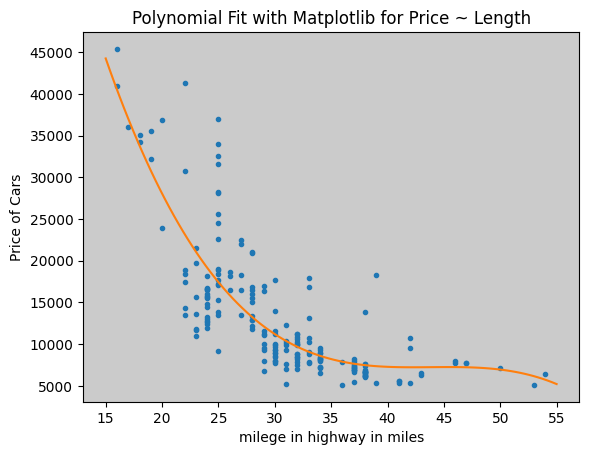

In [269]:
PlotPolly(p, x, y, 'milege in highway in miles')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


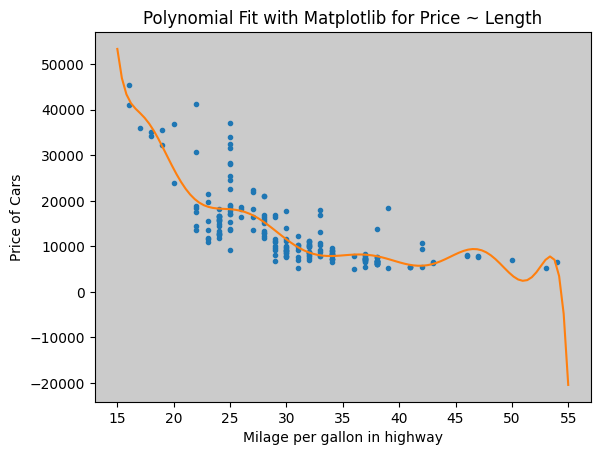

In [271]:
# Create 11 order polynomial model with the variables x and y from above.

f1 = np.polyfit(x,y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, "Milage per gallon in highway")

In [ ]:
'''
The analytical expression for Multivariate Polynomial function gets complicated. For example, the exp
ression for a second-order (degree=2) polynomial with two variables is given by:
'''

Yhat = a + b1X1 + b2X2 + b3X1(X2) + b4(X1)(X1) + b5(X2)(X2)



In [277]:
# We can perform a polynomial transform on multiple features. First, we need to import the module:

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [281]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
z_pr = pr.fit_transform(z)

In [285]:
#In the original data, there are 201 samples and 4 features.

z.shape

(201, 4)

In [287]:
# After the transformation, there are 201 samples and 15 features.

z_pr.shape

(201, 15)

In [291]:
# PIPELINE

'''
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. 
We also use StandardScaler as a step in our pipeline.
'''

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [297]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [299]:
#We input the list as an argument to the pipeline constructor:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [301]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[["price"]]
z = z.astype(float)
pipe.fit(z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [305]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe = pipe.predict(z)
ypipe[0:5]

array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555],
       [16136.29619164]])

In [309]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [313]:
pipe.fit(z,y)
ypipe = pipe.predict(z)
ypipe[0:6]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211],
       [13869.66673213]])

In [ ]:
# 4----> Measures for In-Sample Evaluation

In [ ]:
'''
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).
'''


In [325]:
# Model 1: Simple Linear Regression


# Let's calculate the R^2:

x = df[['highway-mpg']]
y = df[['price']]

lm.fit(x,y)
print( "R Squared Value is:", lm.score(x,y))

# Let's calculate MSE

#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

from sklearn.metrics import mean_squared_error

Yhat = lm.predict(x)

mse = mean_squared_error( y, Yhat)
print("MSE Value is :", mse)




R Squared Value is: 0.4965911884339176
MSE Value is : 31635042.944639888


In [331]:
# Model 2: Multiple Linear Regression


z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y =df[["price"]]

# lets calculate R Squared Value 

lm.fit(z,y)
print("R Squared Value for Multiple Linear Regression is :", lm.score(z,y))


#lets calculate MSE

Yhat = lm.predict(z)
mse = mean_squared_error(y,Yhat)
print("MSE value of MLR is:", mse)


R Squared Value for Multiple Linear Regression is : 0.8093562806577457
MSE value of MLR is: 11980366.87072649


In [339]:
# Model 3: Polynomial Fit

# Let’s import the function r2_score from the module metrics as we are using a different function.

from sklearn.metrics import r2_score

#Let's calculate the R^2.
'''
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

'''
r_squared = r2_score(y, p(x))
print(" R Squared value for Polynomial Fit is :", r_squared)

#lets calculate MSE

MSE_Poly = mean_squared_error(y, p(x))

print(" MSE value for Ploynomil fit is:", MSE_Poly)


 R Squared value for Polynomial Fit is : 0.674194666390652
 MSE value for Ploynomil fit is: 20474146.426361218


In [ ]:
'''
Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7


1) Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. 
Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may 
not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and 
MSE to make the best conclusion about the fit of the model.

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and 
the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the 
MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared
to SLR.

2) Simple Linear Model (SLR) vs. Polynomial Fit

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit
also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better 
fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.


3) Multiple Linear Regression (MLR) vs. Polynomial Fit

MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.



Conclusion
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.
'''
